In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
raw = pd.read_csv('ethereum_price.csv')

In [3]:
df = raw[['Date', 'Close']].copy()
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
ts = df.set_index('Date')
ts.head()

,Close
Date,
2015-08-07,2.770000
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.070000


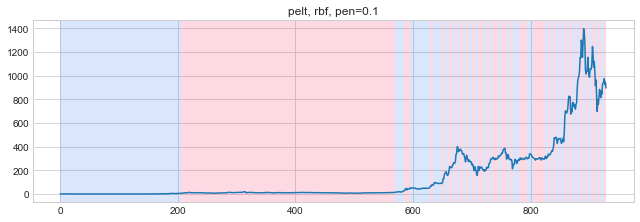

[205, 570, 585, 595, 630, 635, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 720, 725, 730, 735, 745, 750, 760, 765, 770, 780, 795, 805, 825, 830, 835, 840, 845, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 929]


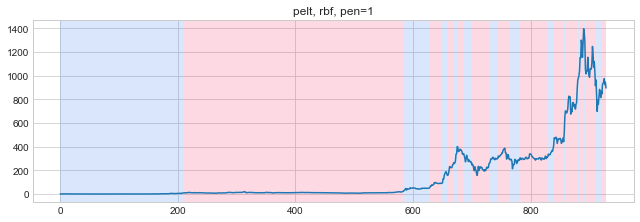

[210, 585, 630, 650, 660, 670, 675, 685, 700, 730, 745, 765, 780, 830, 840, 855, 860, 880, 885, 890, 895, 910, 920, 929]


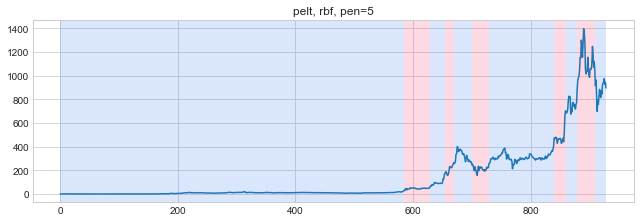

[585, 630, 655, 670, 700, 730, 840, 860, 880, 910, 929]


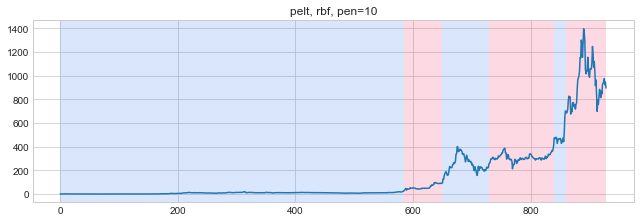

[585, 650, 730, 840, 860, 929]


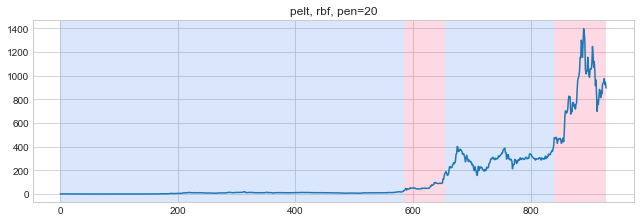

[585, 655, 840, 929]


In [5]:
import ruptures as rpt
# changing penalty
cps_pelt01 = rpt.Pelt(model='rbf').fit_predict(ts, pen=0.1)
cps_pelt1 = rpt.Pelt(model='rbf').fit_predict(ts, pen=1)
#cps_pelt2 = rpt.Pelt(model='rbf').fit_predict(ts, pen=2)
cps_pelt5 = rpt.Pelt(model='rbf').fit_predict(ts, pen=5)
#cps_pelt75 = rpt.Pelt(model='rbf').fit_predict(ts, pen=7.5)
cps_pelt10 = rpt.Pelt(model='rbf').fit_predict(ts, pen=10)
cps_pelt20 = rpt.Pelt(model='rbf').fit_predict(ts, pen=20)

rpt.display(ts, cps_pelt01, figsize=(9,3))
plt.title('pelt, rbf, pen=0.1')
plt.show()
print(cps_pelt01)

rpt.display(ts, cps_pelt1, figsize=(9,3))
plt.title('pelt, rbf, pen=1')
plt.show()
print(cps_pelt1)

#rpt.display(ts, cps_pelt2, figsize=(9,3))
#plt.title('pelt, rbf, pen=2')
#plt.show()
#print(cps_pelt2)

rpt.display(ts, cps_pelt5, figsize=(9,3))
plt.title('pelt, rbf, pen=5')
plt.show()
print(cps_pelt5)

#rpt.display(ts, cps_pelt75, figsize=(9,3))
#plt.title('pelt, rbf, pen=7.5')
#plt.show()
#print(cps_pelt75)

rpt.display(ts, cps_pelt10, figsize=(9,3))
plt.title('pelt, rbf, pen=10')
plt.show()
print(cps_pelt10)

rpt.display(ts, cps_pelt20, figsize=(9,3))
plt.title('pelt, rbf, pen=20')
plt.show()
print(cps_pelt20)

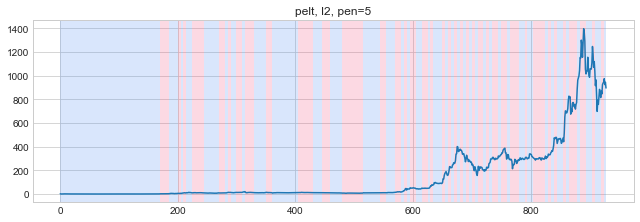

77


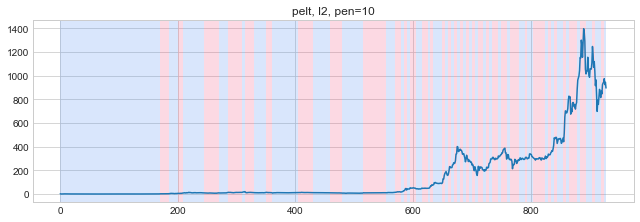

69


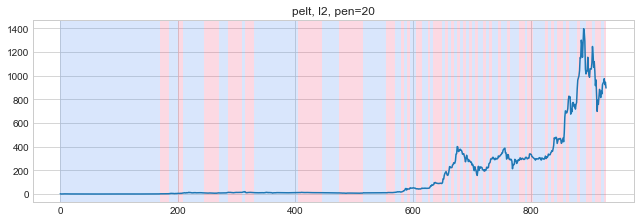

66


In [7]:
cps_pelt_l2_5 = rpt.Pelt(model='l2').fit_predict(ts, pen=5)
cps_pelt_l2_10 = rpt.Pelt(model='l2').fit_predict(ts, pen=10)
cps_pelt_l2_20 = rpt.Pelt(model='l2').fit_predict(ts, pen=20)

rpt.display(ts, cps_pelt_l2_5, figsize=(9,3))
plt.title('pelt, l2, pen=5')
plt.show()
print(len(cps_pelt_l2_5))

rpt.display(ts, cps_pelt_l2_10, figsize=(9,3))
plt.title('pelt, l2, pen=10')
plt.show()
print(len(cps_pelt_l2_10))

rpt.display(ts, cps_pelt_l2_20, figsize=(9,3))
plt.title('pelt, l2, pen=20')
plt.show()
print(len(cps_pelt_l2_20))